In [5]:
import community
import networkx as nx
import matplotlib.pyplot as plt
import utils.graph_utils as graph_utils
import os

In [6]:
input_file = "twitter"

In [7]:
G = graph_utils.load_csv_edges(os.path.join('./data', input_file, input_file + '.csv'), undirected=True)

In [10]:
#first compute the best partition
partition = community.best_partition(G)

{542: 0,
 29: 0,
 87: 0,
 836: 1,
 640: 0,
 469: 1,
 632: 0,
 851: 0,
 551: 0,
 394: 2,
 435: 0,
 57: 2,
 166: 3,
 210: 4,
 241: 2,
 188: 3,
 1006: 0,
 801: 5,
 336: 5,
 509: 0,
 149: 0,
 746: 0,
 1032: 0,
 416: 0,
 631: 0,
 569: 0,
 72: 0,
 53: 0,
 494: 0,
 930: 0,
 955: 1,
 475: 1,
 371: 3,
 834: 0,
 399: 0,
 858: 6,
 915: 7,
 874: 0,
 817: 0,
 1023: 0,
 772: 1,
 748: 8,
 372: 1,
 859: 1,
 49: 8,
 638: 3,
 64: 0,
 960: 3,
 557: 8,
 103: 1,
 314: 8,
 1029: 1,
 1049: 0,
 25: 8,
 358: 7,
 477: 0,
 352: 0,
 736: 8,
 412: 8,
 381: 5,
 313: 8,
 238: 8,
 56: 3,
 353: 0,
 455: 0,
 934: 0,
 131: 8,
 451: 0,
 626: 0,
 1040: 1,
 264: 1,
 445: 3,
 802: 1,
 476: 1,
 611: 0,
 179: 0,
 197: 3,
 530: 9,
 549: 8,
 749: 0,
 454: 0,
 522: 0,
 267: 1,
 1026: 0,
 728: 1,
 346: 8,
 512: 0,
 81: 8,
 326: 1,
 762: 3,
 379: 1,
 710: 0,
 325: 0,
 184: 0,
 231: 0,
 599: 0,
 641: 8,
 683: 1,
 560: 1,
 284: 1,
 526: 3,
 935: 1,
 185: 1,
 873: 1,
 927: 8,
 316: 1,
 181: 1,
 659: 8,
 1041: 1,
 667: 8,
 461: 8,
 99

/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


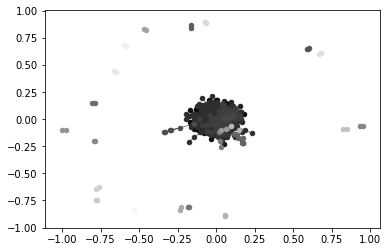

In [9]:

#drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))


nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()